In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from moabb.datasets import BI2013a
from moabb.paradigms import P300


# from mne import Epochs, compute_raw_covariance, compute_covariance
# from mne.preprocessing import Xdawn

from power import field_root_mean_square, plot_fmrs
from data_processing import get_clean_epochs, SpatialFilter

In [4]:
dataset=BI2013a()
dataset.subject_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [5]:
epochs = get_clean_epochs(dataset, subjects_list=[1])

Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
3360 matching events found
No baseline correction applied


/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data 

Dataset median value:  -2.277286300659693e-07
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp

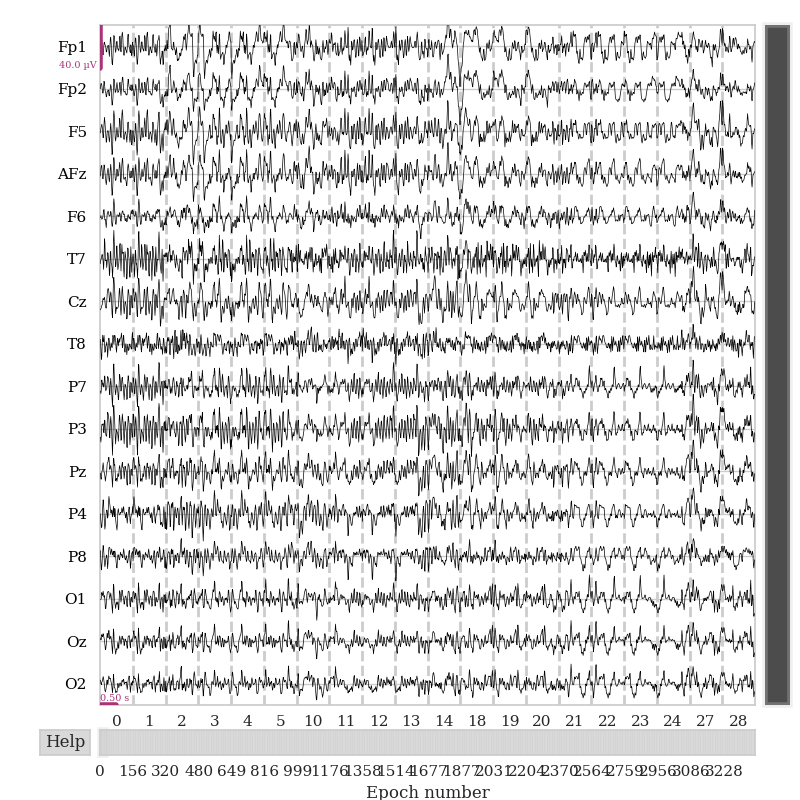

In [15]:
epochs.plot();

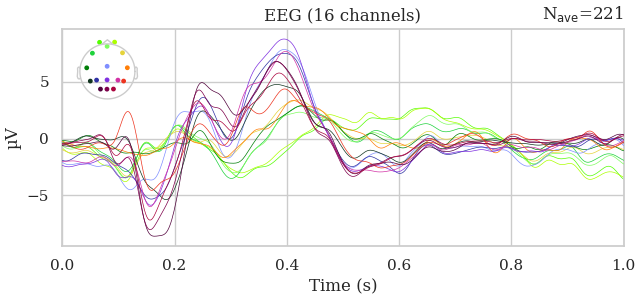

In [8]:
epochs["Target"].average().plot();

No projector specified for this dataset. Please consider the method self.add_proj.


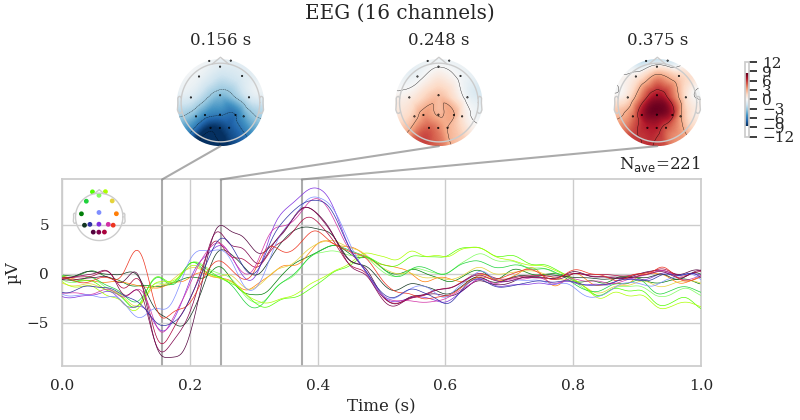

In [14]:
epochs["Target"].average().plot_joint();

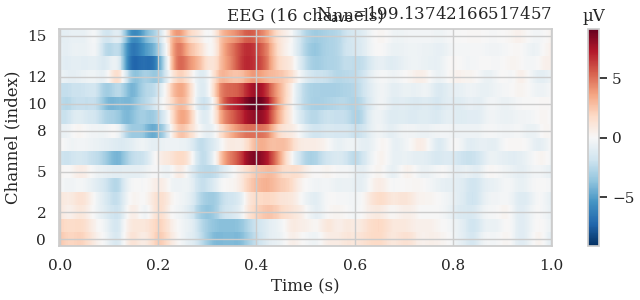

In [9]:
combined_evoked = mne.combine_evoked([epochs["Target"].average(), epochs["NonTarget"].average()], [1,-1])
combined_evoked.plot_image();


<class 'mne.epochs.EpochsArray'>


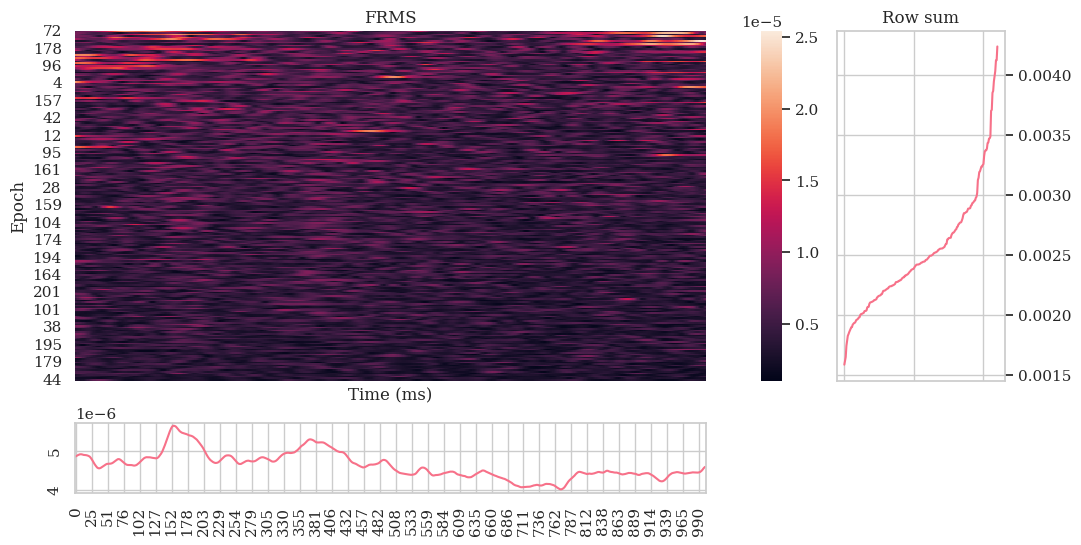

In [47]:
frms = field_root_mean_square(epochs["Target"])
plot_fmrs(frms)

### Apply Spatial Filter

In [48]:
spatial_filter = SpatialFilter(epochs=epochs, p=2)
spatial_filter.fit(class_="Target")
filtered_epochs = spatial_filter.apply(epochs=epochs)

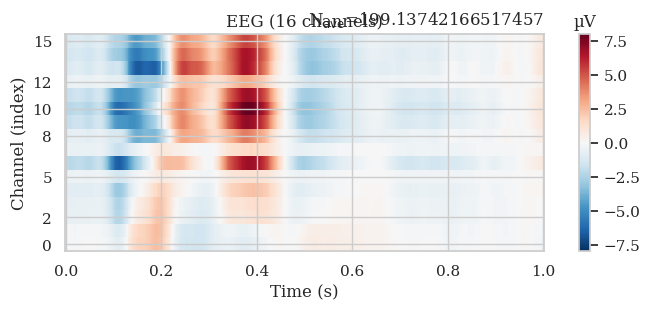

In [49]:
combined_evoked = mne.combine_evoked([filtered_epochs["Target"].average(), filtered_epochs["NonTarget"].average()], [1,-1])
combined_evoked.plot_image();

<class 'mne.epochs.EpochsArray'>


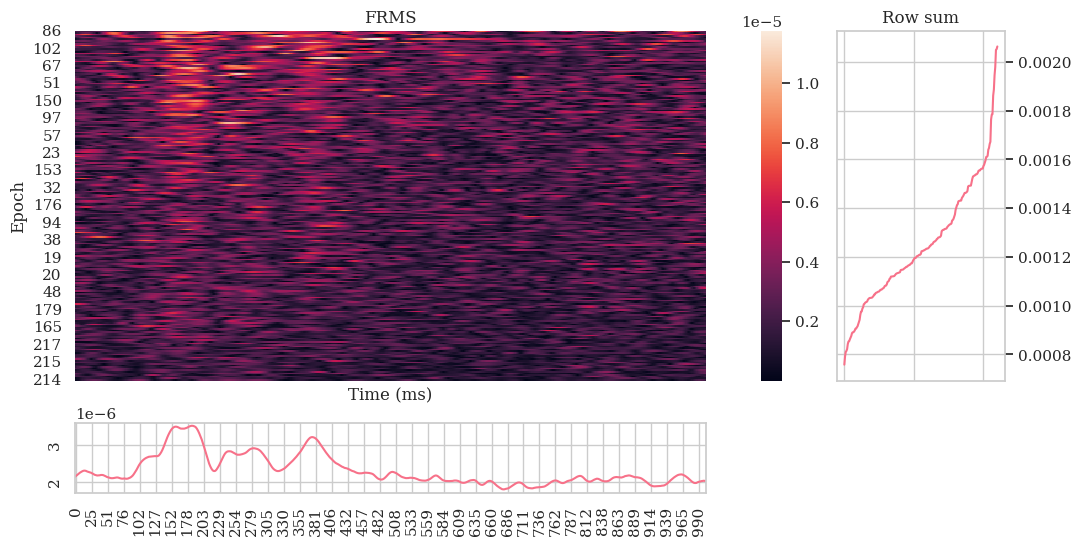

In [50]:
frms = field_root_mean_square(filtered_epochs["Target"])
plot_fmrs(frms)